In [154]:
#import stuff
import pandas as pd
import numpy as np
import numpy.linalg as la
import seaborn as sb
from collections import Counter as c
from matplotlib import pyplot as plt
import math
from math import floor as f
from math import ceil as ce
from sklearn.metrics import confusion_matrix as cm

In [183]:
#import data
adults = pd.read_csv('data/adult.data', header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
    )

iris = pd.read_csv('../../Notes/data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [184]:
#implement the KNN class
class KNN:
    k = 0
    data = None
    labels = None
    
    def __init__(self, k):
        self.k = k
        
    def train(self, vals, labs):
        self.data = vals
        self.labels = labs
    
    def predict(self, X):
        
        #make sure columns equal
        #assert(self.data.shape[1] == (len(X[i]) for i in X)) # will come back to this
        #assert(self.data.shape[1] == len(X[0]))
        
        dist = [
            (self.labels[i], la.norm(X-self.data[i])) for i in range(len(data))
        ]
        
        k_nearest = sorted(dist, key = lambda X: X[1])
        k_nearest = k_nearest[:self.k]

        f = c([p[0] for p in k_nearest])
        return f

In [185]:
#import data
iris = pd.read_csv('../../Notes/data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [186]:
#1 implementation

#create data and class
data = ((np.random.random(size = (100,2))* 9) + 1).round(3)
labels = np.random.choice(['red', 'blue'], 100, p = [0.5, 0.5])

#call class/train, this works for all odd k values
x = KNN(3)
x.train(data,labels)

#testing section
point1 = [18, 2.3]
point2 = [5, 7.5]
point3 = [6.3, 4.2]

count = x.predict([point1])
red = count['red']
blue = count['blue']
print(f'The counts for {point1} are:\nBlue ~> {blue}\nRed ~> {red}')

count = x.predict([point2])
red = count['red']
blue = count['blue']
print(f'The counts for {point2} are:\nBlue ~> {blue}\nRed ~> {red}')

count = x.predict([point3])
red = count['red']
blue = count['blue']
print(f'The counts for {point3} are:\nBlue ~> {blue}\nRed ~> {red}')

The counts for [18, 2.3] are:
Blue ~> 2
Red ~> 1
The counts for [5, 7.5] are:
Blue ~> 1
Red ~> 2
The counts for [6.3, 4.2] are:
Blue ~> 1
Red ~> 2


In [187]:
#2 implementation
def split(data, labels, p):
    
    #make sure 0 <= p <= 1
    assert(p <= 1 and p >= 0)
    
    #get sizes
    n = len(data)
    size1 = n * p
    size2 = n * (1-p)
    
    if (size1 > size2):
        size1 = ce(size1)
    else:
        size1 = f(size1)
    
    
    #get data into one list        
    dist = [
    
        (labels[i], data[i]) for i in range(len(data))
       
    ]
    
    #shuffle data
    np.random.shuffle(dist)
    
    #get subsets and return them
    subset1 = dist[:size1]
    subset2 = dist[size1:]
    
    return subset1, subset2

In [188]:
#test split function
sub1, sub2 = split(x.data, x.labels, 0.75)
#print(sub1)
#print("\n\n\n")
#print(sub2)

In [189]:
#3 implementation
k = 3
knn = KNN(k)

x = iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']].values
labels = iris['class'].values

knn.train(x, labels)

unclassified = [5, 2.2, 1, 4.1]
pred = knn.predict(unclassified)
# max(pred) will not work. Try it out if you don't believe me :) Use:
#unclassified = [5, 2.2, 1, 4.1]
#print(f'The unclassified point {unclassified} has been classified as: {max(pred)}')
#print(pred)
# It will give this output ~> The unclassified point [5, 2.2, 1, 4.1] has been classified as: Iris-versicolor
# when the counter is actually ~> nter({'Iris-setosa': 2, 'Iris-versicolor': 1})

# We need this to get true max
Set = pred['Iris-setosa']
Vir = pred['Iris-virginica']
Ver = pred['Iris-versicolor']

print(f'The unclassified point {unclassified} has the following counts:\nSetosa ~> {Set}\nVirginica ~> {Vir}\nVersicolor ~> {Ver}')

The unclassified point [5, 2.2, 1, 4.1] has the following counts:
Setosa ~> 2
Virginica ~> 0
Versicolor ~> 1


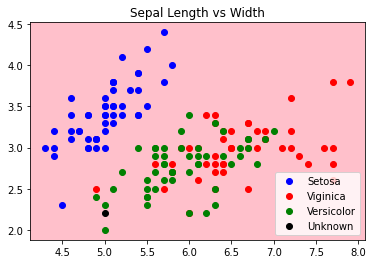

In [190]:
# Split data into 3 smaller sets by the classes 
setosa = iris[iris['class'] == 'Iris-setosa']
virginica = iris[iris['class'] == 'Iris-virginica'].reset_index()
versicolor = iris[iris['class'] == 'Iris-versicolor'].reset_index()

#plot em 
plt.scatter(x = setosa['sepal_length'], y = setosa['sepal_width'], color = 'b')
plt.scatter(x = virginica['sepal_length'], y = virginica['sepal_width'], color = 'r')
plt.scatter(x = versicolor ['sepal_length'], y = versicolor ['sepal_width'], color = 'g')

#unclassified point
plt.scatter(x=unclassified[0], y=unclassified[1], color='black') 

plt.legend(['Setosa', 'Viginica', 'Versicolor', 'Unknown'])
plt.title("Sepal Length vs Width")
plt.gca().set_facecolor('pink')

In [191]:
k = 3
knn = KNN(k)

x = iris[['sepal_length','sepal_width']].values
labels = iris['class'].values

knn.train(x, labels)

unclassified = [5, 2]
pred = knn.predict(unclassified)

# We need this to get true max
Set = pred['Iris-setosa']
Vir = pred['Iris-virginica']
Ver = pred['Iris-versicolor']

print(f'The unclassified point {unclassified} has the following counts:\nSetosa ~> {Set}\nVirginica ~> {Vir}\nVersicolor ~> {Ver}')

The unclassified point [5, 2] has the following counts:
Setosa ~> 0
Virginica ~> 0
Versicolor ~> 3


In [192]:
#4 implementation
# A)

#get sepal_width
sepal_widths = KNN(3)
sepal_widths.train(iris['sepal_width'], iris['class'])

#split and display data
p = 0.7
ds1, ds2 = split(sepal_widths.data, sepal_widths.labels, p)


#print(ds1)
#print("\n\n")
#print(ds2)

# make predicitons and display confusion matrix
pred_labels1 = []
actuals1 = []
for i in ds1:
    # get prediction
    pred = sepal_widths.predict(i[1])
    pred = pred.most_common(1) # this is the real way to do the max count :)
    pred = pred[0]
    pred_labels1.append(pred[0])

# get predictions
pred = [ (ds1[i][1], pred_labels1[i]) for i in range(len(pred_labels1))]

#get/print actuals
print("Actual Labels:\n==============")
for i in ds1:
    actuals1.append(i[0])
print(actuals1)

#print predictions
print("\nPredicted Labels:\n=================")
print(pred_labels1)

#confustion matrix
print("\nConfusion Matrix:\n=================\n", cm(actuals1, pred_labels1))

Actual Labels:
['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris

In [193]:
# B)
# We can test this with various sizes. I'm electing to test 0.2, 0.3, 0.7, and 0.8
# 0.7 was tested above, below are the rest
"""
This is p = 0.3
"""

# make predicitons and display confusion matrix
pred_labels2 = []
actuals2 = []
for i in ds2:
    # get prediction
    pred = sepal_widths.predict(i[1])
    pred = pred.most_common(1) # this is the real way to do the max count :)
    pred = pred[0]
    pred_labels2.append(pred[0])

# get predictions
pred = [ (ds2[i][1], pred_labels2[i]) for i in range(len(pred_labels2))]

#get/print actuals
print("===========\nFor p = 0.3\n===========\n")
print("Actual Labels:\n==============")
for i in ds2:
    actuals2.append(i[0])
print(actuals2)

#print predictions
print("\nPredicted Labels:\n=================")
print(pred_labels2)

#confustion matrix
print("\nConfusion Matrix:\n=================\n", cm(actuals2, pred_labels2))

For p = 0.3

Actual Labels:
['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica']

Predicted Labels:
['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris

In [194]:
"""
Setting up data for next 2 p-values; 0.2 and 0.8
"""
#get sepal_width
sepal_widths = KNN(3)
sepal_widths.train(iris['sepal_width'], iris['class'])

#split and display data
p = 0.8
ds3, ds4 = split(sepal_widths.data, sepal_widths.labels, p)


#print(ds1)
#print("\n\n")
#print(ds2)

# make predicitons and display confusion matrix
pred_labels3 = []
actuals3 = []
for i in ds3:
    # get prediction
    pred = sepal_widths.predict(i[1])
    pred = pred.most_common(1) # this is the real way to do the max count :)
    pred = pred[0]
    pred_labels3.append(pred[0])

# get predictions
pred = [ (ds3[i][1], pred_labels3[i]) for i in range(len(pred_labels3))]

#get/print actuals
print("===========\nFor p = 0.8\n===========\n")
print("Actual Labels:\n==============")
for i in ds3:
    actuals3.append(i[0])
print(actuals3)

#print predictions
print("\nPredicted Labels:\n=================")
print(pred_labels3)

#confustion matrix
print("\nConfusion Matrix:\n=================\n", cm(actuals3, pred_labels3))

For p = 0.8

Actual Labels:
['Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-ver

In [195]:
# make predicitons and display confusion matrix
pred_labels4 = []
actuals4 = []
for i in ds4:
    # get prediction
    pred = sepal_widths.predict(i[1])
    pred = pred.most_common(1) # this is the real way to do the max count :)
    pred = pred[0]
    pred_labels4.append(pred[0])

# get predictions
pred = [ (ds4[i][1], pred_labels4[i]) for i in range(len(pred_labels4))]

#get/print actuals
print("===========\nFor p = 0.2\n===========\n")
print("Actual Labels:\n==============")
for i in ds4:
    actuals4.append(i[0])
print(actuals4)

#print predictions
print("\nPredicted Labels:\n=================")
print(pred_labels4)

#confustion matrix
print("\nConfusion Matrix:\n=================\n", cm(actuals4, pred_labels4))

For p = 0.2

Actual Labels:
['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

Predicted Labels:
['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-s

In [198]:
# C)
p = 0.7
for i in range(0,10):
    #get sepal_width
    sepal_widths = KNN(3)
    sepal_widths.train(iris['sepal_width'], iris['class'])

    #split and display data

    ds1, ds2 = split(sepal_widths.data, sepal_widths.labels, p)

    # make predicitons and display confusion matrix
    pred_labels1 = []
    actuals1 = []
    for i in ds1:
        # get prediction
        pred = sepal_widths.predict(i[1])
        pred = pred.most_common(1) # this is the real way to do the max count :)
        pred = pred[0]
        pred_labels1.append(pred[0])
        
    #get predicitons    
    pred = [ (ds1[i][1], pred_labels1[i]) for i in range(len(pred_labels1))]
    
    for i in ds1:
        actuals1.append(i[0])
    
    print(f'\np ~>{p: 1.1}')
    print("Confusion Matrix:\n=================\n", cm(actuals1, pred_labels1))
    
print("\n\nIt seems there is slight variation between each matrix, but the differences aren't drastic.")


p ~> 0.7
Confusion Matrix:
 [[36  2  0]
 [10 21  0]
 [21 15  0]]

p ~> 0.7
Confusion Matrix:
 [[35  1  0]
 [11 23  0]
 [18 17  0]]

p ~> 0.7
Confusion Matrix:
 [[32  2  0]
 [10 22  0]
 [23 16  0]]

p ~> 0.7
Confusion Matrix:
 [[37  2  0]
 [10 24  0]
 [20 12  0]]

p ~> 0.7
Confusion Matrix:
 [[31  1  0]
 [11 23  0]
 [22 17  0]]

p ~> 0.7
Confusion Matrix:
 [[34  1  0]
 [12 24  0]
 [21 13  0]]

p ~> 0.7
Confusion Matrix:
 [[33  2  0]
 [11 24  0]
 [18 17  0]]

p ~> 0.7
Confusion Matrix:
 [[32  1  0]
 [11 26  0]
 [19 16  0]]

p ~> 0.7
Confusion Matrix:
 [[39  2  0]
 [10 23  0]
 [15 16  0]]

p ~> 0.7
Confusion Matrix:
 [[35  1  0]
 [13 21  0]
 [22 13  0]]


It seems there is slight variation between each matrix, but the differences aren't drastic.


In [202]:
#5 implementation
#get education-num
ed_num = KNN(3)
ed_num.train(adults['education-num'], adults['income'])

#split and display data
p = 0.7
ds1, ds2 = split(ed_num.data, ed_num.labels, p)


#print(ds1)
#print("\n\n")
#print(ds2)

# make predicitons and display confusion matrix
pred_labels1 = []
actuals1 = []
for i in ds1:
    # get prediction
    pred = ed_num.predict(i[1])
    pred = pred.most_common(1) # this is the real way to do the max count :)
    pred = pred[0]
    pred_labels1.append(pred[0])

# get predictions
pred = [ (ds1[i][1], pred_labels1[i]) for i in range(len(pred_labels1))]

#get actuals
for i in ds1:
    actuals1.append(i[0])

#confusion matrix
print(f'p ~> {p:1.1}\nConfusion Matrix:\n=================\n', cm(actuals1, pred_labels1))

p ~>0.7
Confusion Matrix:
 [[12450  4865]
 [ 3341  2137]]
